In [1]:
import glob
from generate_descriptors_amptorch import Generate_acsf_descriptor, Generate_soap_descriptor
from ase.io import read, write, Trajectory
import matplotlib.pyplot as plt
import seaborn as sns
from asap3 import EMT
import numpy as np

In [2]:
img_list = []
ene_list = []
fps_list = []
for i, file in enumerate(glob.glob('../result_Cu4Pd5Ni6/round_16/0_1.traj')):
    #if i==1:
        #break
    #print(file)
    traj = Trajectory(file)
    #print(traj, len(traj))
    for j, img in enumerate(traj):
        #if j == 2:
            #break
        img.calc = EMT()
        #print(img)
        ene = img.get_potential_energy()
        acsf_fp, species  = Generate_acsf_descriptor(img)
        fps = acsf_fp.flatten()
        #print(len(fps))
        #print(species)
        #print(i,j, ene)
        img_list.append(img)
        ene_list.append(ene)
        fps_list.append(fps)

print(len(img_list), len(ene_list), len(fps_list))


13085 13085 13085


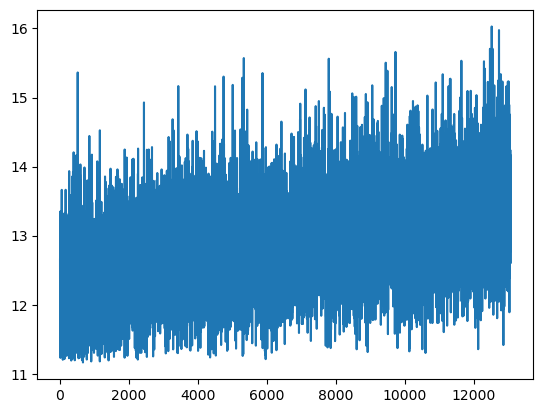

In [3]:
plt.plot(ene_list)

Text(0.5, 9.444444444444438, 'Energy (eV)')

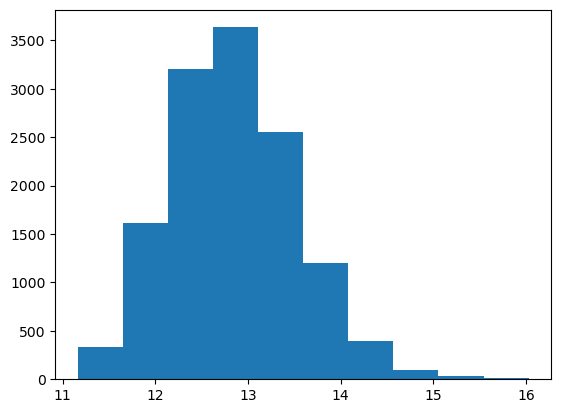

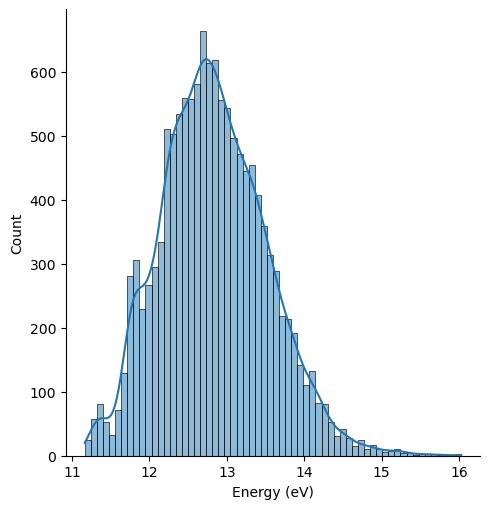

In [4]:
plt.hist(ene_list)
sns.displot(ene_list, kde=True)
plt.xlabel('Energy (eV)')
#plt.ylabel('Y-axis')

In [5]:
fps_arr = np.array(fps_list)
print(fps_arr.shape)
#print(fps_arr[0])

(13085, 945)


In [6]:

X = fps_arr
y = np.array(ene_list)
print(X.shape, y.shape)

(13085, 945) (13085,)


(945,)


Text(0, 0.5, 'Cumulative Explained Variance')

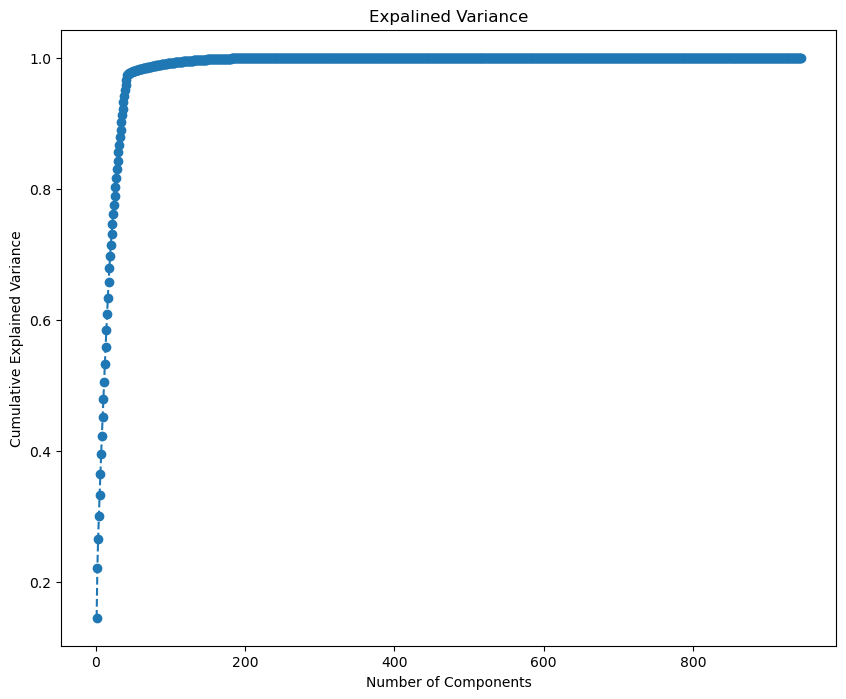

In [7]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)
print(pca.explained_variance_ratio_.shape)
n_rows, n_cols = X.shape
plt.figure(figsize=(10,8))
plt.plot(range(1,n_cols+1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle = '--')
plt.title('Expalined Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [8]:
n_components = 20
pca = PCA(n_components=n_components)
pca.fit(X)
pca.explained_variance_ratio_
print(np.sum(pca.explained_variance_ratio_))

0.714817102783497


In [9]:
n_components = 2
pca = PCA(n_components=n_components)
pca.fit(X)
pca.explained_variance_ratio_
print(np.sum(pca.explained_variance_ratio_))

0.22205093475046753


In [10]:
pca = PCA(n_components=20)
pca.fit(X)
X_pca_reduced = pca.transform(X)
X_pca_reduced.shape


(13085, 20)

[2532270.7865757123, 2158194.367304091, 2039603.3581632643, 1962170.4443500426, 1917132.6416728033, 1877485.2105473415, 1843770.0806912072, 1816720.32222058, 1790053.8782832262, 1767257.252490988, 1745018.8546000707, 1725301.208315628, 1706495.4656734357, 1688311.0317658784, 1671052.7926172572, 1657091.8349921643, 1645489.9242576796, 1630712.5542553936, 1619384.3564826776, 1608017.1717856645, 1595370.106544503, 1584845.3298498015, 1574702.326927311, 1566239.186701817, 1555721.180676538, 1548599.234140279, 1541486.6752426154, 1531378.3561202441, 1526002.6210874186, 1520001.1998465615, 1511485.901053897, 1504995.0076073713, 1500114.2914524705, 1493863.4220853914, 1485905.2971191448, 1479662.4077717, 1475801.2560445536, 1470809.1970265517, 1467062.8634227416, 1462123.273496234, 1457536.6039576447, 1454167.333621276, 1449640.5607739834, 1444399.970478753, 1438925.8645198797, 1436601.0192713453, 1433176.595245787, 1429399.7887763525, 1423593.551720604, 1419280.8686458485, 1418003.3782891035

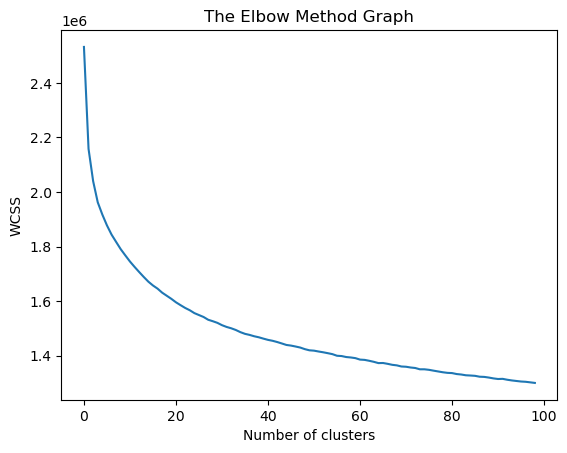

In [11]:
#https://medium.com/pursuitnotes/k-means-clustering-model-in-6-steps-with-python-35b532cfa8ad
#https://365datascience.com/tutorials/python-tutorials/pca-k-means/

from sklearn.cluster import KMeans
wcss=[]

for i in range(1,100): 
     kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10,random_state=0 )
     kmeans.fit(X_pca_reduced)
     wcss.append(kmeans.inertia_)


print(wcss)
plt.plot(wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [12]:
kmeans_pca = KMeans(n_clusters=5, init ='k-means++',n_init= 10, max_iter=10000, random_state=0 )
kmeans_pca.fit(X_pca_reduced)

KMeans(max_iter=10000, n_clusters=5, n_init=10, random_state=0)

In [13]:
print(X.shape)
print(X_pca_reduced.shape)

(13085, 945)
(13085, 20)


(13085, 2)
(1688, 1699)
[15 15 15 ... 13 13 13]
(2867912,)
reduced data shape: (13085, 2)


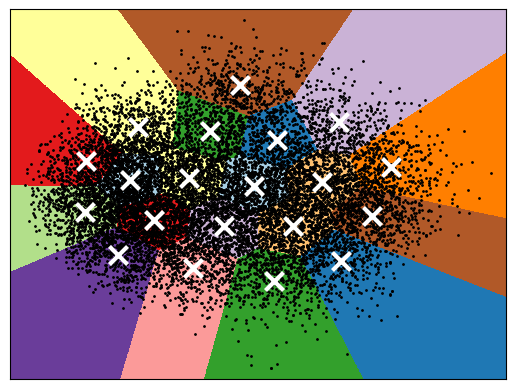

In [14]:
# Reference for the plot https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html
#PCA allows to project the data from the original d-dimensional space into a lower dimensional space. 
# #Subsequently, we can use PCA to project into a 2-dimensional space and plot the data and the clusters in this new space.

import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

reduced_data = PCA(n_components=2).fit_transform(X)

#KMeans Clustering
n_clusters =  20
kmeans = KMeans(init="k-means++", n_clusters=n_clusters, n_init=4, random_state=42)
kmeans.fit(reduced_data)
print(reduced_data.shape)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
print(xx.shape)

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
print(Z)
print(Z.shape)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
print('reduced data shape:', reduced_data.shape)

# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
#plt.title(
    #"K-means clustering on the minimum energy configurations of nanoclusters (PCA-reduced data)\n"
    #"Centroids are marked with white cross"
#)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [15]:
#Fitting X not (X_pca_reduced) takes too long

#from sklearn.cluster import KMeans
#wcss=[]

#for i in range(1,100): 
     #kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10,random_state=0 )
     #kmeans.fit(X)
     #wcss.append(kmeans.inertia_)


#print(wcss)
#plt.plot(wcss)
#plt.title('The Elbow Method Graph')
#plt.xlabel('Number of clusters')
#plt.ylabel('WCSS')
#plt.show()

(13085, 2)
(1689, 1699)
[ 5  5  5 ... 16 16 16]
(2869611,)
reduced data shape: (13085, 2)


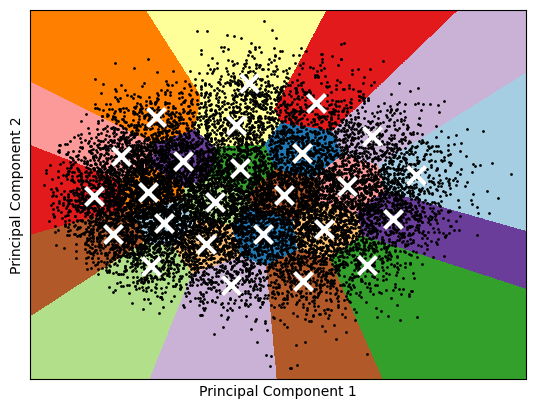

In [16]:
# Reference for the plot https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html
#PCA allows to project the data from the original d-dimensional space into a lower dimensional space. 
# #Subsequently, we can use PCA to project into a 2-dimensional space and plot the data and the clusters in this new space.

import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

reduced_data = PCA(n_components=2).fit_transform(X)

#KMeans Clustering
n_clusters =  25
kmeans = KMeans(init="k-means++", n_clusters=n_clusters, n_init=10, random_state=42)
kmeans.fit(reduced_data)
print(reduced_data.shape)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
print(xx.shape)

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
print(Z)
print(Z.shape)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
print('reduced data shape:', reduced_data.shape)

# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
#plt.title(
    #"K-means clustering on the minimum energy configurations of nanoclusters (PCA-reduced data)\n"
    #"Centroids are marked with white cross"
#)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.show()

In [17]:
n_components = 2
pca = PCA(n_components=n_components)
pca.fit(X)
pca.explained_variance_ratio_
print(np.sum(pca.explained_variance_ratio_))

0.22205093145429836
